# Common Password List ( rockyou.txt )

## Введение

В `2009 году` компания `RockYou` столкнулась с серьезным инцидентом взлома. Один из основных проблем был тот факт, что они хранили пароли пользователей в незашифрованном виде, что позволило злоумышленникам получить доступ к этим данным. В результате, список всех паролей был украден и стал доступным для общего пользования. Это было серьезным нарушением безопасности, которое подчеркивает важность правильного хранения и защиты паролей пользователей.

# Анализ паролей

## Подключаем библиотеки которые в дальнейшем будем использовать

Первая бибилеотека pandas, она нам понадобиться для выгрузки информации для её анализа           

`matplotlib` и `seaborn` для отображения графиков

`numpy` для расчетов и вычислений(*в библеотеке покапался но не нашел никакого практического применения в моем коде*)

Импортируем `Iterable` для проверки, является ли объект итерируемым, используя функцию `isinstance()`.


Далее выгружаем наш дата сет

In [6]:
import pandas as pd # Для выгрузки этого
import numpy as np # для рассчетов
import matplotlib.pyplot as plt # графика 
import seaborn as sns # тоже графика 
from collections.abc import Iterable

In [7]:
arr = pd.read_csv('New_rockyou.txt', encoding='UTF-8', sep='\t')
print(arr)

               Password
0                123456
1                 12345
2             123456789
3              password
4              iloveyou
...                 ...
14344241       xCvBnM,
14344242        ie168
14344243    abygurl69
14344244       a6_123
14344245  *7Â¡Vamos!

[14344246 rows x 1 columns]


In [8]:
arr.count()

Password    14344243
dtype: int64

## Чистка

У меня возникла ситуация, когда у нас имеется набор данных, содержащий различные пароли. 

Однако, в этом наборе данных присутствуют нежелательные элементы, такие как `гиперссылки` и `HTML-разметка`. Моя цель заключается в удалении этих нежелательных элементов из набора данных, чтобы получить более чистые и удобные данные для дальнейшего анализа их. Код ниже как раз таки это и делает

In [9]:
index=0
delpos=[]
for k in arr.Password:
    if isinstance(k, str):
        if "http://" in k or "://" in k or "<div>" in k or "<!DOCTYPE" in k or "src=" in k:#Удаление странных ссылок и подобного мусора
            delpos.append(index)
    index+=1
arr=arr.drop(delpos).reset_index(drop=True)

`delpos` - позиции которые по каким либо причинам надо удалить 

`index` - индекс паролей которые надо удлаить

## Главный анализа

Первым делом я создал отдельные переменные и перекинул туда датасет для дальнейшей обработки 

In [10]:
arr_from_data = arr.values[:]
arr_check=[]
for k in arr_from_data:
    for i in k:
        arr_check.append(i)
a=len(arr_check)
arr_check=set(arr_check)
b=len(arr_check)
print(a-b)


356


`arr_from_data` - массив с массивами паролей из дата сета

`arr_check` - просто массив паролей который мы отделили за счет цикла

В данном мы будем перебирать символы котоыре не являются буквами или цифрами

Логика перебора проста если такой элемент есть то по инедексу в первом списке мы добавляем единицу во второй, если такого элемента нет, то мы добавляем его и первый список и добавляем счет во второй и сразу плюсуем ему единицу 


In [11]:
signs_val = []
signs_name = []

for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if not j.isdigit() and not j.isalpha():
                if j in signs_name:
                    signs_val[signs_name.index(j)] += 1
                else:
                    signs_name.append(j)
                    signs_val.append(0)
                    signs_val[signs_name.index(j)] += 1
print(signs_name, signs_val)

['!', '%', '?', ')', '\\', ' ', '_', '-', '*', '.', '@', '=', '<', ';', '&', ',', '(', "'", '#', '+', '\x89', '/', '`', ':', '\x84', '¶', ']', '$', '±', '[', '~', '€', '^', '©', '>', '\x9f', '«', '\x81', '\x94', '\x80', '\x88', '\x85', '\xa0', '\x96', '"', '{', '}', '§', '¢', '\x91', '\x8e', '\x82', '|', '\x99', '·', '\x97', '¡', '\x87', '\x9a', '\x8a', '°', '£', '\x9e', '\x83', '\x95', '\x9c', '¥', '\x98', '×', '\x9b', '®', '\x86', '¬', '\xad', '\x92', '\x8b', '\x8c', '\n', '¿', '\x7f', '\x9d', '¯', '\x8d', '\x93', '\x90', '»', '\x8f', '\x1a', '\x08', '÷', '\x04', '\x03'] [143161, 10265, 18407, 18992, 28425, 95339, 193589, 133267, 123968, 249926, 108302, 18512, 9573, 12607, 26562, 30141, 17068, 15506, 49200, 27504, 747, 48266, 5679, 6792, 1868, 1575, 10824, 36166, 4350, 7748, 8371, 425, 6402, 726, 2482, 2609, 766, 1358, 363, 811, 2836, 2078, 1712, 1388, 1931, 1052, 966, 1198, 871, 527, 57, 227, 714, 2534, 1658, 1264, 625, 309, 85, 237, 1442, 2027, 862, 192, 1301, 263, 513, 269, 450, 1

In [ ]:
for i in signs_name:
    if not i in'`!"#$%&()*+,-./:;<=>?@[\]^_`{|}~£¥€¢¤©®™§¶†‡°±¼½¾¿¡«»‘’“”„‹›•·`÷×¬¯':
        print(i)

In [21]:
a = "'"
signs_n_buf= []
signs_v_buf=[]
signs_n_buf.append(a)
signs_v_buf.append(signs_val[signs_name.index(a)])
for i in signs_name:
    if i in '`!"#$%&()*+,-./:;<=>?@[\]^_`{|}~£¥€¢¤©®™§¶†‡°±¼½¾¿¡«»‘’“”„‹›•·`÷×¬¯':
        signs_n_buf.append(i)
        signs_v_buf.append(signs_val[signs_name.index(i)])
print(signs_n_buf,signs_v_buf)


["'", '!', '%', '?', ')', '\\', '_', '-', '*', '.', '@', '=', '<', ';', '&', ',', '(', '#', '+', '/', '`', ':', '¶', ']', '$', '±', '[', '~', '€', '^', '©', '>', '«', '"', '{', '}', '§', '¢', '|', '·', '¡', '°', '£', '¥', '×', '®', '¬', '¿', '¯', '»', '÷'] [15506, 143161, 10265, 18407, 18992, 28425, 193589, 133267, 123968, 249926, 108302, 18512, 9573, 12607, 26562, 30141, 17068, 49200, 27504, 48266, 5679, 6792, 1575, 10824, 36166, 4350, 7748, 8371, 425, 6402, 726, 2482, 766, 1931, 1052, 966, 1198, 871, 714, 1658, 625, 1442, 2027, 513, 450, 125, 114, 117, 97, 95, 3]


`signs_val` - количества определенных по их индексу символов

`signs_name` - сами символы 


Данный сегмент кода ответственне за определение длинны пароля, работает по такому же принципу как и прошлый сегмент, в дальнейшем нам это пригодиться для определение средней длины пароля у 14 млн пользователей

In [8]:
name_col_word = [] 
num_col_word = []

for k in arr_check:
    if isinstance(k, Iterable):  
        if len(k) in name_col_word:
            num_col_word[name_col_word.index(len(k))] += 1
        else:
            name_col_word.append(len(k))
            num_col_word.append(0)
            num_col_word[name_col_word.index(len(k))] += 1

print(name_col_word, num_col_word)

[6, 5, 9, 8, 7, 10, 11, 4, 13, 12, 16, 17, 15, 3, 14, 2, 18, 39, 26, 20, 1, 22, 19, 21, 23, 24, 38, 28, 30, 40, 27, 35, 34, 32, 42, 43, 37, 49, 33, 25, 44, 36, 29, 41, 31, 53, 48, 77, 47, 45, 165, 50, 150, 149, 137, 71, 61, 59, 58, 57, 52, 63, 95, 67, 51, 64, 60, 55, 85, 78, 66, 54, 84, 80, 70, 73, 109, 81, 69, 56, 72, 65, 46, 68, 75, 88, 62, 79, 74, 123, 252, 87, 93, 89, 118, 195, 97, 92, 104, 98, 188, 255, 142, 208, 230, 228, 90, 82, 103, 189, 171, 126, 125, 218, 76, 111, 101, 200, 192, 243, 124, 148, 117, 151, 249, 239, 86, 170, 105, 154, 129, 145, 106, 141, 108, 146, 131, 113, 232, 83, 133, 198, 94, 91, 185] [1947862, 259252, 2190979, 2965989, 2506254, 2013588, 865983, 17933, 364148, 555316, 118368, 36893, 161184, 2464, 248522, 335, 23776, 113, 2243, 13073, 45, 6159, 15572, 7848, 4848, 4234, 64, 1192, 980, 53, 1809, 127, 183, 398, 67, 40, 78, 17, 296, 2939, 30, 186, 777, 43, 465, 11, 39, 3, 22, 51, 2, 22, 2, 1, 1, 7, 20, 7, 15, 16, 14, 14, 2, 11, 21, 17, 19, 22, 3, 5, 10, 25, 6, 4,

`name_col_word` - количество символов в пароли

`num_col_word` - количество количество символов в пароли в массиве по их индексу

Данный сегмент кода ответственне за определение количества букв, работает по такому же принципу как и прошлый сегмент, в дальнейшем нам это пригодиться для определение средней длины пароля у 14 млн пользователей

In [9]:
alf_name = []
alf_val = []

for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if j.isalpha():
                if j in alf_name:
                    alf_val[alf_name.index(j)] += 1
                else:
                    alf_name.append(j)
                    alf_val.append(0)
                    alf_val[alf_name.index(j)] += 1
print(alf_name, alf_val)

['p', 'a', 's', 'w', 'o', 'r', 'd', 'i', 'l', 'v', 'e', 'y', 'u', 'n', 'c', 'k', 'b', 'g', 'm', 'j', 'h', 'q', 't', 'f', 'z', 'x', 'P', 'A', 'S', 'W', 'O', 'R', 'D', 'I', 'L', 'V', 'E', 'Y', 'U', 'N', 'C', 'B', 'K', 'G', 'J', 'H', 'T', 'M', 'Ã', 'Q', 'F', 'X', 'Z', 'Â', 'à', 'ž', 'â', 'ª', 'µ', 'Œ', 'Å', 'Ä', 'Ž', 'ñ', 'ï', 'Ÿ', 'œ', 'º', 'å', 'æ', 'ø', 'Ù', 'Ø', 'Î', 'Ï', 'Š', 'š', 'é', 'Ð', 'Û', 'Æ', 'ú', 'ó', 'í', 'ì', 'è', 'ä', 'ç', 'ã', 'Ñ', 'á', 'ð', 'ù', 'î', 'Õ', 'Ë', 'Í', 'É', 'Ò', 'Ó', 'È', 'Ì', 'À', 'Ö', 'ü', 'ß', 'ö', 'ý', 'ê', 'Ý'] [1620586, 8832757, 4156268, 800059, 5176728, 4578789, 2485532, 5555134, 4462592, 1051271, 7206510, 2374327, 2308268, 4829916, 2609686, 2012839, 2111759, 1718090, 3206742, 1238040, 2336557, 178661, 3426864, 982177, 763884, 479942, 131645, 604635, 315368, 59728, 330430, 320128, 199376, 356871, 331835, 76283, 459918, 161083, 137343, 316801, 209360, 188204, 144121, 130208, 122449, 163069, 249515, 260211, 7554, 17936, 81115, 36054, 53578, 1723, 34731

`alf_name` - наименование букв из паролей

`alf_val` - количество букв по их индексу

Данный сегмент кода ответственный за определение количества из конкретных цифр, работает по такому же принципу как и все сегменты до него, в дальнейшем нам это нам пригодиться для опеределение есть ли в пароли цифры 

In [10]:
num_val = []
num_name = []

for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if j.isdigit():
                if j in num_name:
                    num_val[num_name.index(j)] += 1
                else:
                    num_name.append(j)
                    num_val.append(0)
                    num_val[num_name.index(j)] += 1
print(num_name, num_val)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '¹', '³', '²'] [6732607, 5235365, 3766254, 3390220, 3353670, 3117292, 3099652, 3566268, 3854572, 5738656, 5487, 1475, 1064]


`num_val` - коилчество конкретных цифр по их индексу

`num_name` - сами цифры 


Здесь мы определяем количество гласных и соглысных букв, а для того чтобы в них не попали лишние символы, воспрользуемся аси кодом и подметим что в основном длина аси у обычныхх букв 3, на основе этого выделим

In [11]:
vowels_val = 0
consonants_val = 0

for i in alf_name:
    if len(ascii(i))==3 and i.lower() in "aioeu":
        vowels_val += alf_val[alf_name.index(i)]
    elif len(ascii(i))==3 and not i.lower() in "aioeu":
        consonants_val+=alf_val[alf_name.index(i)]
print(vowels_val,consonants_val)

30968594 50992648


`vowels_val` - количество гласных

`consonants_val` - количество согласных 

Здесь мы подсчитываем сколько цифр, букв и символов было во всех паролях 

In [12]:
num=0
alf=0
sign=0
for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if j.isdigit():
                num+= 1
            elif j.isalpha():
                alf+= 1
            else:
                sign+=1
print(num, alf, sign)

41862582 82045716 1510596


`num` - количество цифр

`alf` - количество букв 

`sign` - количество символов

## Диаграммы

Данная диаграмма отображает статистику по количеству определеннных символов, можно заметить, что люди чаще всего используют сиволы 1, 2 и 0, странно замечать что цифра три которая находиться рядом находиться лишь на 5ом месте, из чего можно сделать вывод что люди используют эти три символа 

<BarContainer object of 13 artists>

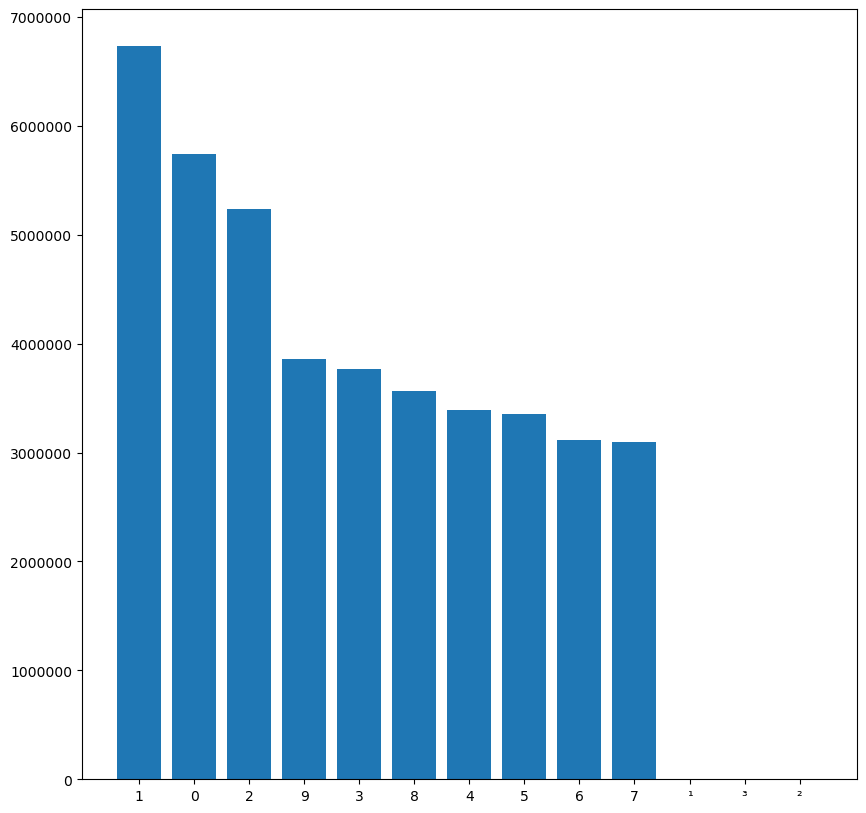

In [13]:
num_bar = pd.DataFrame({'Number':num_name, 'Val':num_val})
plt.figure(figsize=(10, 10))
plt.ticklabel_format(style='plain')
num_bar = num_bar.sort_values('Val', ascending=False)

plt.bar(num_bar.Number,num_bar.Val)

Здесь диаграмма отношения цифр, букв и символов, заметим что люди практически не используют какие либо спец символы, а чаще всего используют или буквы или цифры, отсюда можно сделать вывод что для усиления паролей нужно лишь использовать спец символы 

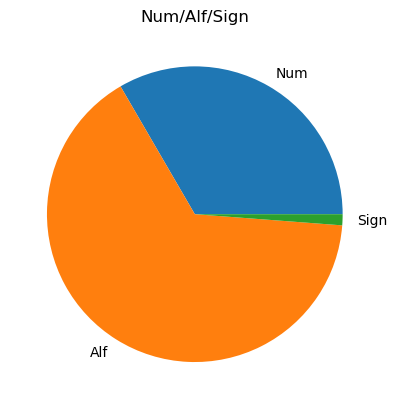

In [14]:
name = ["Num","Alf","Sign"]
val = [num, alf,sign]
plt.title("Num/Alf/Sign") 
plt.pie(val,labels=name)# диаграмма пирог через matplotlib также рандомная
plt.show()

Буквы обозначены оражевым цветом

Цифры обозначены синим цветом

Спец символы обозначены зеленым цветом

Здесь мы выводим диаграмму количество количества символов в паролях, но делаем выборку и берем лишь длины паролей количесвто которых больше 5000, если паролей меньше то мы убираем их в other, можем подметить что чаще всего длина пароля является 8, а далее по убыванию 7, 9, 10, 6, 11, 12, 13

Из этого можно сделать вывод что идеальная длина пароля средняя этих восьми элементов 76/8 = 9,5 =~ 10

Это нам в дальнейшем пригодиться при написание своего API для проверки устойчивости пароля


/tmp/ipykernel_3982/3447811243.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bar_pas_col = long.append(pd.Series(short_sum, index=["ColW"], name="24"))


<Axes: xlabel='NameColW'>

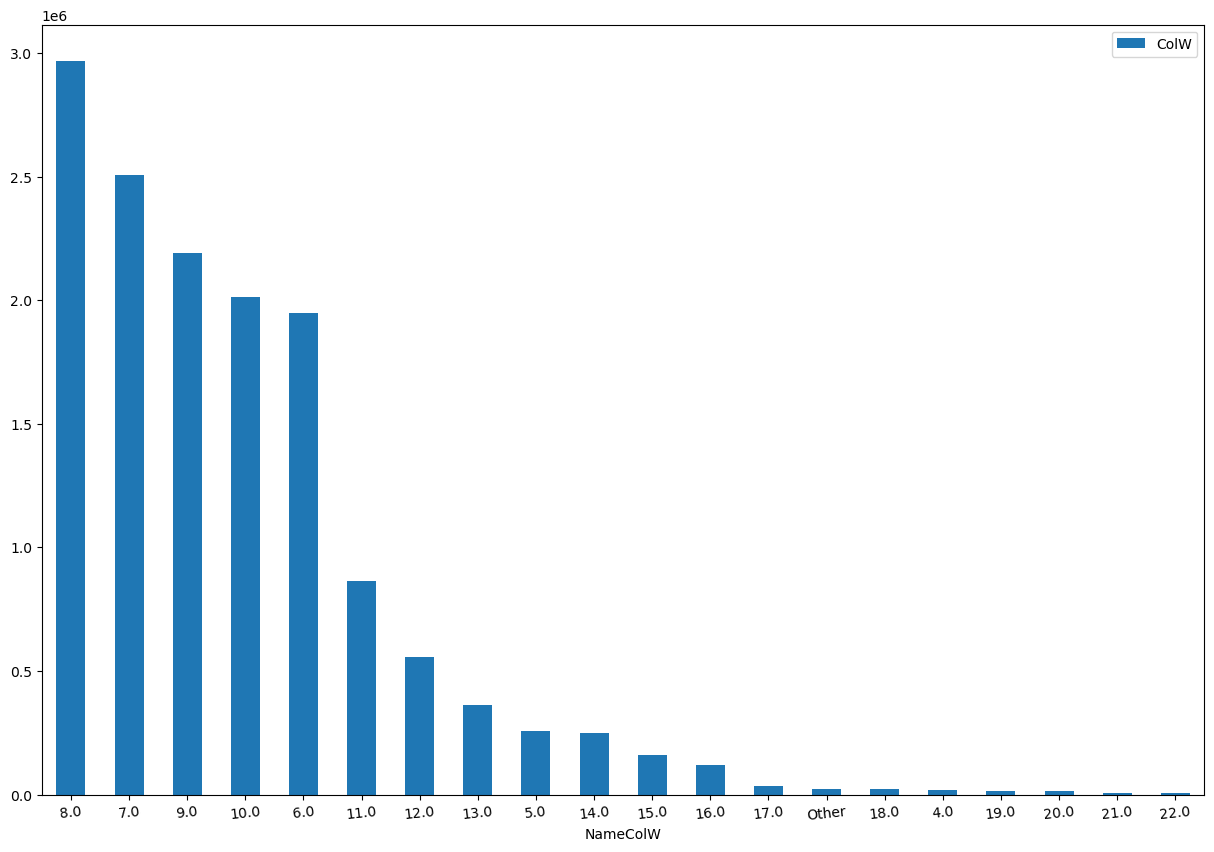

In [15]:
word_count = pd.DataFrame({'NameColW':name_col_word, 'ColW':num_col_word})

word_count['ColW']=pd.to_numeric(word_count['ColW'], errors='coerce')

short_other = word_count[word_count.ColW<5000]
long = word_count[word_count.ColW>=5000]

short_sum = short_other.ColW.sum()
short_other=pd.Series(short_sum, index=["ColW"])

bar_pas_col = long.append(pd.Series(short_sum, index=["ColW"], name="24"))
bar_pas_col.NameColW = bar_pas_col.NameColW.fillna('Other')
bar_pas_col = bar_pas_col.sort_values('ColW', ascending=False)

bar_pas_col.plot(kind="bar", y="ColW", x="NameColW", rot=6, fontsize=10, figsize=(15,10))


По `Y` - идет количество паролей в експаненциальном виде(1e6 = 1000000)

По `X` - идет длина паролей

Здесь у нас отношение гласных и согласных букв, выделим что гласных при 5ти гласных, они занимают чуть меньше половины от всех

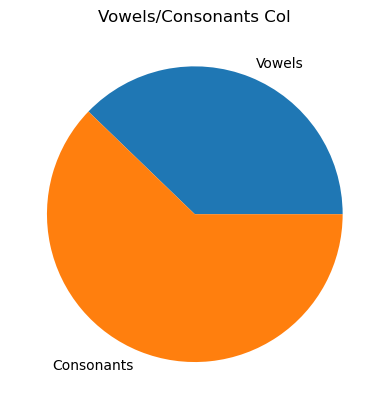

In [16]:
name_v_c = ["Vowels","Consonants"]
val_v_c = [vowels_val,consonants_val]
plt.title("Vowels/Consonants Col") 
plt.pie(val_v_c,labels=name_v_c)
plt.show()

Здесь мы строим какие буквы являются самыми популярными, но перед этим мы сделаем небольшую чистку и уберем буквы в другое если их меньше 10000

Можно заметить что буква a, чаще всего используется в словах, так как она первая в алфавите и люди не задумываясь пишут ее


/tmp/ipykernel_3982/879912741.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bar_alf = main_alf.append(pd.Series(other_alfSum, index=["Col"], name="24"))


<Axes: xlabel='Name'>

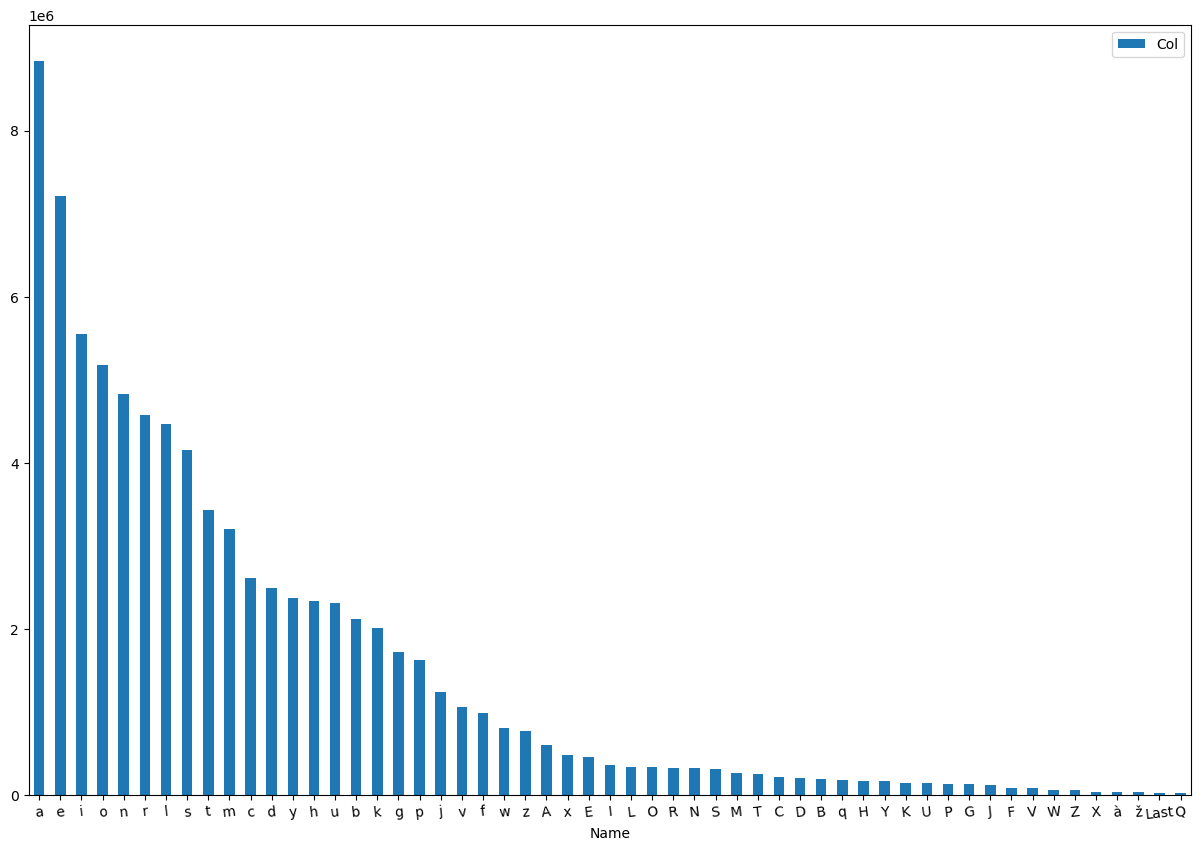

In [17]:
col_alf = pd.DataFrame({'Name':alf_name, 'Col':alf_val})

col_alf['Col']=pd.to_numeric(col_alf['Col'], errors='coerce')

other_alf = col_alf[col_alf.Col<10000]
main_alf = col_alf[col_alf.Col>=10000]

other_alfSum = other_alf.Col.sum()
other_alf=pd.Series(other_alfSum, index=["Col"])

bar_alf = main_alf.append(pd.Series(other_alfSum, index=["Col"], name="24"))
bar_alf.Name = bar_alf.Name.fillna('Last')
bar_alf = bar_alf.sort_values('Col', ascending=False)

bar_alf.plot(kind="bar", y="Col", x="Name", rot=6, fontsize=10, figsize=(15,10))

По `Y` - у нас количество букв в экспанетном виде(1e6 = 1000000)

По `X` - у нас расположены сами буквы 

Тут, как и в других, статистика самых популярных символов. Здесь подметим что во первых, символов довольно мало, не одного миллиона, а во вторых, самой популярной является точка.

Но главное что отсюда можно подчеркнуть, то что люди практически не используют спец символы, а отсюда делаем вывод, что такие пароли легче взламать брутом 

/tmp/ipykernel_12743/698321295.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bar_sign = main_sign.append(pd.Series(other_signSum, index=["CSign"], name="24"))


<Axes: xlabel='NSign'>

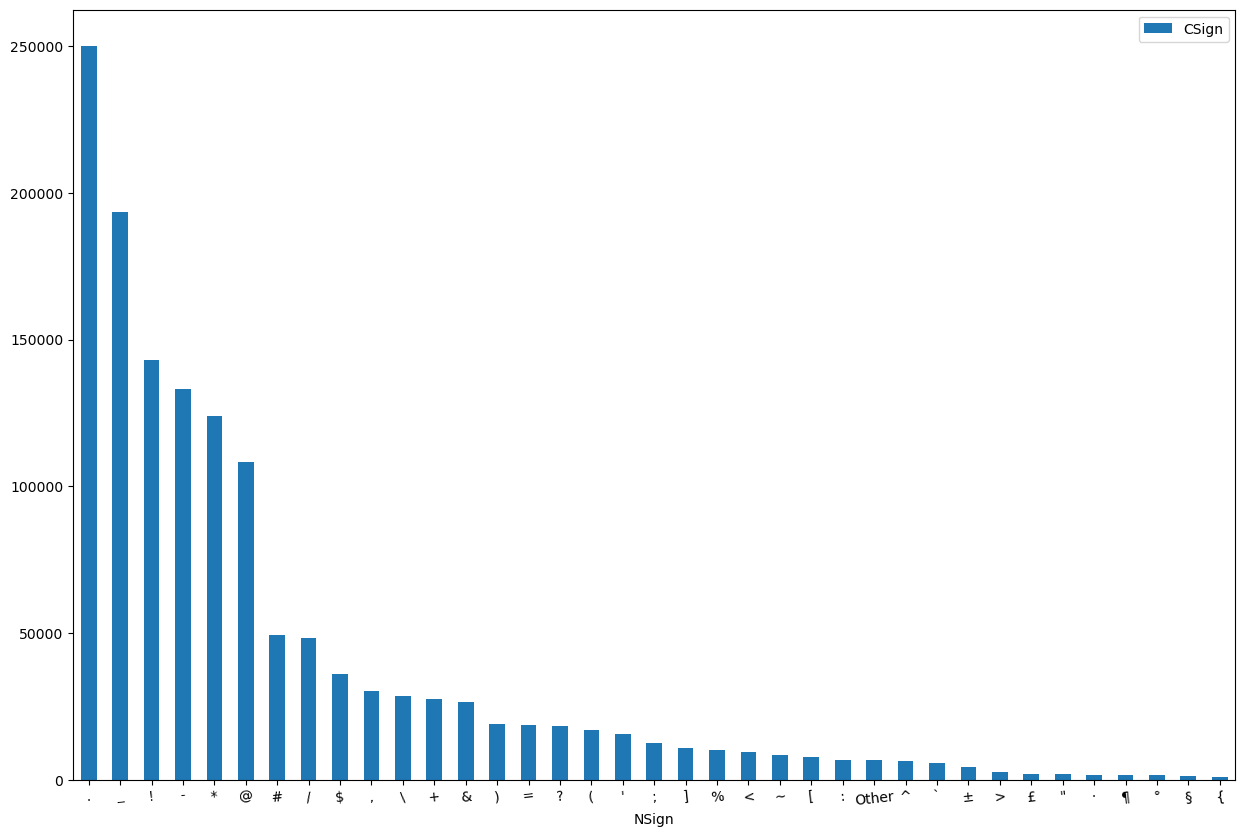

In [23]:
colich_sign = pd.DataFrame({'NSign':signs_n_buf, 'CSign':signs_v_buf})

colich_sign['CSign']=pd.to_numeric(colich_sign['CSign'], errors='coerce')

other_sign = colich_sign[colich_sign.CSign<1000]
main_sign = colich_sign[colich_sign.CSign>=1000]

other_signSum = other_sign.CSign.sum()
other_sign=pd.Series(other_signSum, index=["CSign"])

bar_sign = main_sign.append(pd.Series(other_signSum, index=["CSign"], name="24"))
bar_sign.NSign = bar_sign.NSign.fillna('Other')
bar_sign = bar_sign.sort_values('CSign', ascending=False)

bar_sign.plot(kind="bar", y="CSign", x="NSign", rot=6, fontsize=10, figsize=(15,10))

По `Y` - у нас количество символов

По `X` - у нас расположены сами символы

## Доп анализ на слова внутри паролей

Далее я решил проанализировать пароли на слова которые есть в внутри паролей, для начала я выбрал 13ть своих слов и начал искать их

In [20]:
my_word_for_analysis = ['password','love','man','woman', 'you','qwerty','superman','sexy','football','baseball','monkey','luck','kill']
my_word_for_analysis_val=[]

for i in range(len(my_word_for_analysis)): my_word_for_analysis_val.append(0)

for k in arr.Password:
    for word in my_word_for_analysis:
        if isinstance(k, Iterable) and word in k.lower():
            my_word_for_analysis_val[my_word_for_analysis.index(word)]+=1
            
for i in my_word_for_analysis:
    print(i, my_word_for_analysis_val[my_word_for_analysis.index(i)])

password 4687
love 206789
man 138114
woman 1497
you 46680
qwerty 2066
superman 1167
sexy 35665
football 1621
baseball 760
monkey 7623
luck 7585
kill 13773


Получил следующее количество и отобразил их на графике 

<Axes: xlabel='Word'>

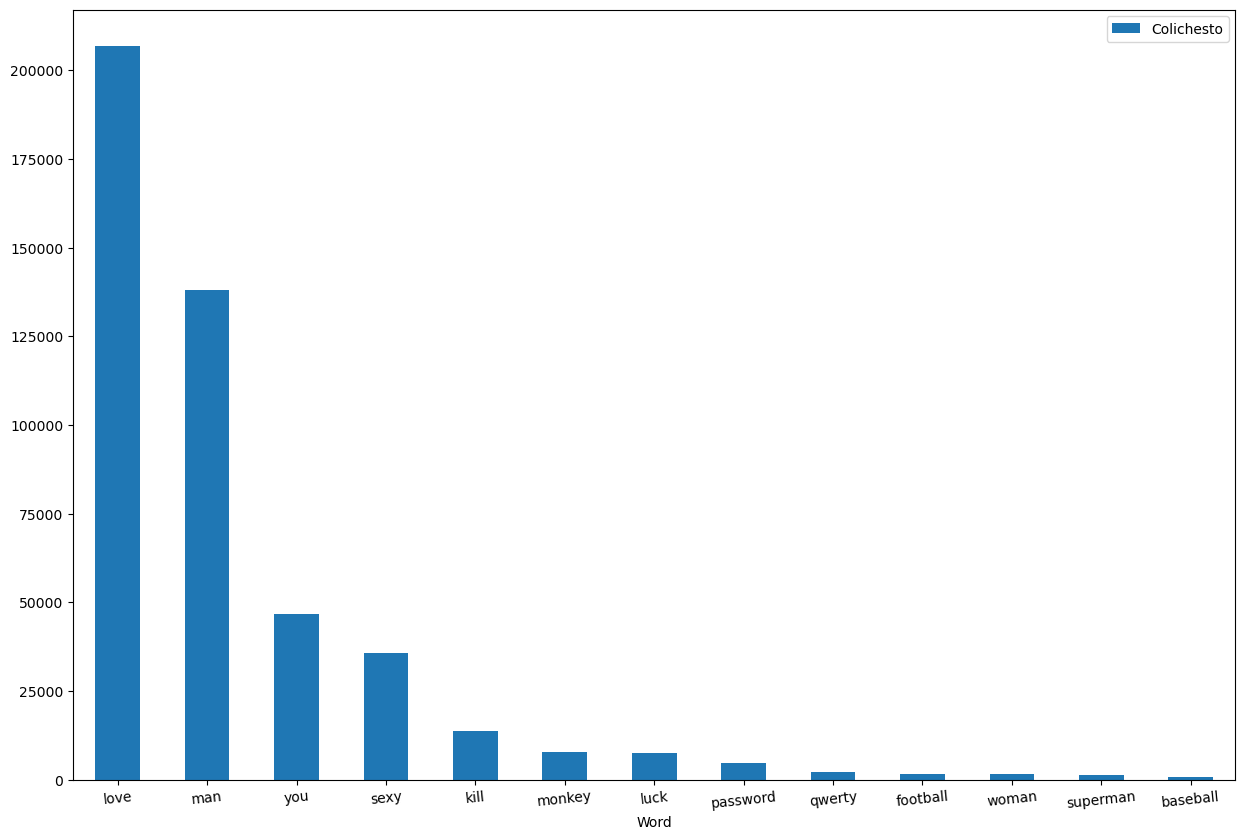

In [21]:
my_word_analysis_pd = pd.DataFrame({'Word':my_word_for_analysis, 'Colichesto':my_word_for_analysis_val})
my_word_analysis_pd = my_word_analysis_pd.sort_values('Colichesto', ascending=False)

my_word_analysis_pd.plot(kind="bar", y="Colichesto", x="Word", rot=6, fontsize=10, figsize=(15,10))

Подметим что люди часто используют очень простые и популярные слова такими как `love`, `man`, `you`, `sexy`

Но я задумался над тем, что такое количество слов не интересно и мало что может показать и я решил подключить и проанализировать 10000 слов, но после выборки ручной, осталось 5000

In [22]:
eng_ten_word = pd.read_excel('10000eng.xlsx')
eng_ten_word

,Word
0,had
1,than
2,million
3,who
4,In
...,...
4951,totaling
4952,announcing
4953,guarantees
4954,Contra


Далее я решил избавиться от слов которые короче трех символов, которые начинаются с большой буквы(ну и также получается и слова которые полностью из них состоят), которые имеют апостров, а также если их длинна больше 8, так как самая распространненая длинна пароля это 8 и отсюда я решил не брать слова длинее 

In [23]:
poskof=0
delpos=[]
for k in eng_ten_word.Word:
    if isinstance(k, str):
        if "'" in k or len(k)<3 or k.isupper() or k[0].isupper() or len(k)>8:
            delpos.append(poskof)
    poskof+=1
eng_ten_word=eng_ten_word.drop(delpos).reset_index(drop=True)

Так же я убрал слова повторения, то есть если слово имеет приписку `-s`, `-ing`, `-es`, `-ed` то мы их удаляем для более простой выборки 

In [24]:
delpos=[]
poskof=0
for k in eng_ten_word.Word:
    if isinstance(k, str):
        for j in eng_ten_word.Word:
            if (k+"s")==j or (k+"es")==j or (k+k[2]+"ing")==j or (k+"ing")==j or (k+k[2]+"s")==j or (k+k[2]+"es")==j or (k+"ed")==j or (k+k[2]+"ed")==j:
                delpos.append(poskof)
        poskof+=1
eng_ten_word=eng_ten_word.drop(delpos).reset_index(drop=True)        

In [25]:
eng_ten_word

,Word
0,had
1,than
2,who
3,you
4,all
...,...
2296,metric
2297,speaker
2298,gotten
2299,waves


Такими махинациями мы убрали половину слов, и осталось перебраить их все

Здесь мы делаем следующее 

Создает новый список `word_eng`, содержащий значения из столбца `Word` в `eng_ten_word`. Каждое значение приводится к строковому типу данных с помощью `str(i)` для того чтобы сразу избавиться от преобразовния так как очень сильно замедлиться процесс при сравнении 

Создает новый список `word_eng_val`, содержащий нули. Длина списка равна количеству элементов в списке `word_eng`

Создает `paslow`, содержащую значения из столбца `Password` в `arr`. Каждое значение приводится к нижнему регистру с помощью метода `lower()`, а также заранее приобразовываем их для опять же упрощения процесса сравнения 

Фильтруем `paslow`, оставляя только значения, длина которых меньше 14 символов. Результат сохраняется обратно в `paslow`.

Создает `word_indices`, где ключами являются значения из списка `word_eng`, а значениями являются их индексы в списке. Индексы получаются с помощью функции `enumerate()` из `word_eng`.



In [26]:
word_eng = [str(i) for i in eng_ten_word.Word]
word_eng_val = [0 for i in range(len(word_eng))]
paslow = arr['Password'].str.lower()
paslow = paslow[paslow.str.len() < 14]
word_indices = {word: index for index, word in enumerate(word_eng)}

А это часть кода самая долга по времени по этому перед ней было очень мороки, в чем суть это банальный перебор наличия слов в паролях, но вот загвостка, паролей `14 млн`, слов `2300` из чего делаем вывод, что количество сравнений `14*2300*10^6 = 32200000000` и как бы для cравнений это немного много, особенно если условие будет сложным, как было до оптимизации, но после того как я понял то что сравнение должно быть простым для скорости, то получилось вот это 

In [26]:
for k in paslow:
    for word in word_eng:
        if word in k:
            word_eng_val[word_indices[word]]+=1

In [ ]:
for i in word_eng:
    print(i, word_eng_val[word_eng.index(i)])

<Axes: xlabel='Word'>

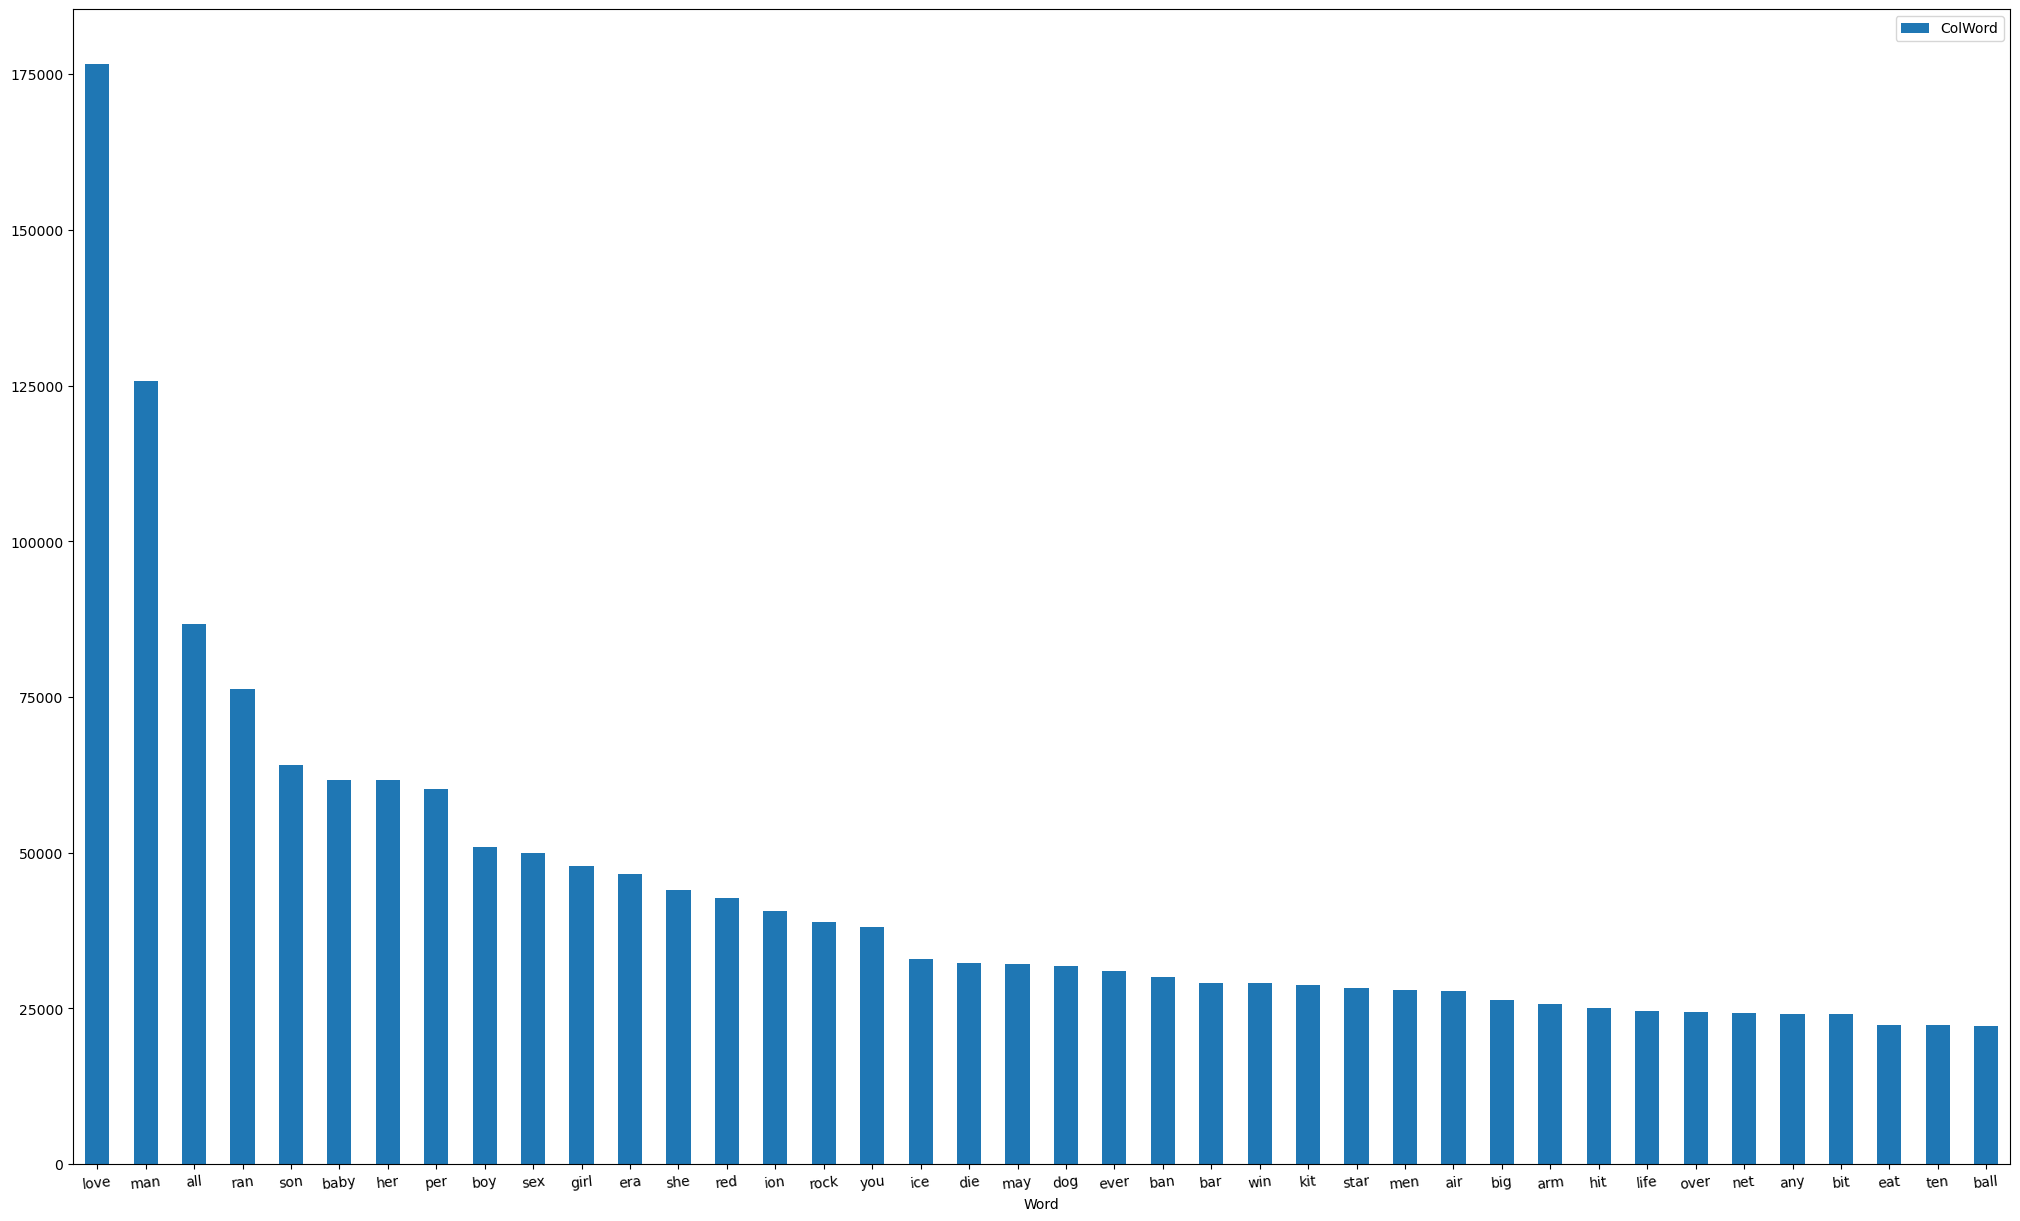

In [28]:
word_ten_analysis = pd.DataFrame({'Word':word_eng, 'ColWord':word_eng_val})
word_ten_analysis['ColWord']=pd.to_numeric(word_ten_analysis['ColWord'], errors='coerce')

main_word = word_ten_analysis[word_ten_analysis.ColWord>=20000]

main_word = main_word.sort_values('ColWord', ascending=False)

main_word.plot(kind="bar", y="ColWord", x="Word", rot=6, fontsize=10, figsize=(25,15))


Тут ситуация идентичная, слово `love` снова на первом месте, как и слово `man`, далее оказалось слово `all` 

Смотря на эту статистику можно увидеть что слова довольно часть являются частью пароля

In [ ]:
t=0
p=0
for k in paslow:
    for word in word_eng:
        if word in k:
            t+=1
            


`t` - переменная хранящая пароли, где есть осмысленные слова

Цикл практически идентичен для поиска количества слов, но только здесь немного проще, так как не надо искать конкретное слово

In [32]:
print(t)

3430289


Количество паролей с словами внутри

И небольшая диаграмма, по которой можно судить, что практически 1/4 паролей содержут какие либо слова

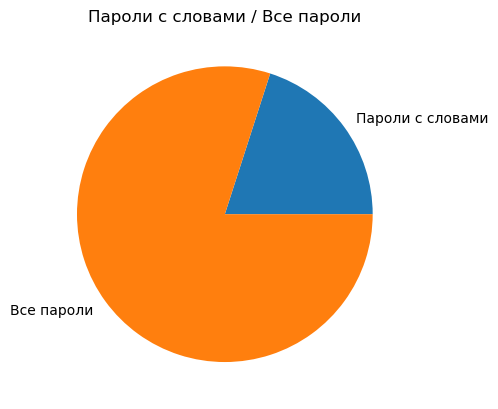

In [38]:
name = ["Пароли с словами","Все пароли"]
val= [t,len(paslow)]
plt.title("Пароли с словами / Все пароли") 
plt.pie(val,labels=name)
plt.show()

## API по определению насколько пароль сильный

Испоьзуя данный полученные из анализа паролей напишем свои API для определения насколько пароль надежный

`koef_alf_up=1` - данный показатель указывает есть ли в пароле заглавные буквы (изначально он единица, так как букв изначально нет)

`koef_num=1` -  данный показатель указывает есть ли в пароле цифры (изначально он единица, так как цифр изначально нет)

`koef_len=1` - данный показатель указывает является ли пароль по длинне большей или равный среднему показателю (изначально он единица, так как пароль изначально 0)

`koef_sign=1` - данный показатель указывает есть ли в спец символы цифры (изначально он единица, так как спец символов изначально нет)

`koef_have=0` - данный показатель указывает есть ли пароль в базе паролей (изначально он ноль, так как его не проверили на наличие)

`koef_rep=0` - данный показатель указывает есть ли в пароле повторения (изначально он ноль, так как повторений нету)

`koef_in_have=0` - данный показатель указывает есть ли в пароле слова (изначально он ноль, так как его не проверили на наличие)


In [52]:
password="ssssaf123saS"

koef_alf_up=1
koef_num=1
koef_len=1
koef_sign=1
koef_have=0
koef_rep=0
#koefHeh=0
koef_in_have=0
lenpass = len(password)


reclen=0
k , t , p =0 , 0 , 1
a = str(password[0])
for i in bar_pas_col.NameColW:
    if k==8:break
    reclen+=i
    k+=1
    
reclen/=8
reclen=round(reclen)

if lenpass>=reclen: 
    koef_len=0

for i in range(lenpass):
    if password[i].isupper():
        koef_alf_up=0
        break

for i in range(lenpass):
    if str(password[i]) in signs_name or not(str(password[i]).isdigit() and str(password[i]).isalpha()):
        koef_sign=0
        break

for i in arr.Password: 
    if password == str(i): 
        koef_have=99999
        break
            
for i in range(lenpass):
    if password[i].isnumeric():
        koef_num=0
        break

for i in my_word_analysis_pd.Word: 
    if str(i) in password: 
        koef_in_have+=1 
        
for i in range(lenpass-1):
    if str(password[i])==str(password[i+1]):
        p+=1
    elif p>3:
        koef_rep=1
        break
    else:
        p=1

    
total_score=koef_alf_up + koef_num + koef_len + koef_sign + koef_have + koef_rep + koef_in_have    
if koef_have > 0:
    print("Пароль находиться в базе слитых паролей измените его")
elif total_score>=10:
    print(password + " не надежный так как")
    print("Не содержит букву верхнего регистра") if koef_alf_up == 1 else None
    print("Содержит повторения") if koef_rep == 1 else None
    print("Не содержит цифру") if koef_num == 1 else None
    print("Не является оптимальной длиной. " + reclen + " оптимальная длинна") if koef_len == 1 else None
    print("Не содержит спец символы") if koef_sign == 1 else None
    print("Содержит повторения") if koef_rep == 1 else None
    print("Cодержит слова и поэтмоу пароль легче взловать") if koef_in_have == 1 else None
elif total_score==0:
    print(password + " является полностью надежным")
elif total_score  <= 5:
    print(password + " надежный, но у него есть изъяны")
    print("Не содержит букву верхнего регистра") if koef_alf_up == 1 else None
    print("Не содержит цифру") if koef_num == 1 else None
    print("Не является оптимальной длиной. "+ str(reclen) + " оптимальная длинна") if koef_len == 1 else None
    print("Не содержит спец символы") if koef_sign == 1 else None
    print("Содержит повторения") if koef_rep == 1 else None
    print("Cодержит слова и поэтмоу пароль легче взловать") if koef_in_have == 1 else None

print(total_score)




ssssaf123saS надежный, но у него есть изъяны
Содержит повторения
1
